# Initial Spotify EDA

Here we will use the spotify api and analyze the top songs 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials  # used to login to spotify client
%matplotlib inline

In [77]:
# logining into the spotify api

cid = 'd328d69f743743ae9784dbc555e47a85'  # Login
secret = '9a363b6c67d2445fa072c7820fcc8c43'  # Client Secret #

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [78]:

listyear =[]
tracklist =[]
# Using the Spotipy Library and Spotify API to get data from a range of years. 
def get_spotify (start_year, end_year):
    years_int = np.arange(int(start_year),int(end_year)+1)  # sets the interested range of years we're interested in
    for year in years_int:
        # initilizing blank lists for values returned from api
        artist_name = []
        track_name = []
        popularity = []
        song_id = []

        y = 'year:{}'.format(year)
        for i in range (0,500, 50):  # sets loops to loop through entires in limits of 50
            results = sp.search(q=y, type='track', limit=50, offset=i)  # specifies the query in a dictionary, type, limit, and offests of api
            # now we will loop through each item per track per returned by the api
            for index, track in enumerate(results['tracks']['items']):
                song_id.append(track['id'])
                artist_name.append(track['artists'][0]['name'])
                track_name.append(track['name'])
                popularity.append(track['popularity'])
                
        # creating a dataframe from lists created above
        tracks = pd.DataFrame({'song_id':song_id, 'artist_name':artist_name, 
                           'track_name':track_name,'popularity':popularity, 'year':year})
    
        tracks.to_csv('tracklist{}.csv'.format(year), index=False)
        tracklist.append('tracklist{}.csv'.format(year))  # appends each years seach to the tracklist 
        listyear.append('tracks{}'.format(year))
    
    
# # #         print(index, track)
# # #     song_id.append(results['tracks']['items'][i]['id'])  # indexes returned dictionary to find the song id

In [79]:
start_year=2015
end_year =2020
get_spotify(start_year, end_year)

In [80]:
print(listyear[5])

tracks2020


In [81]:
# loading the data into variables 
for x, y in zip(listyear,tracklist):
    print(y,'is being read into variable', x)
    globals()[x] = pd.read_csv(y)  # sets x as a global variable based on the name of the trackyear 

tracklist2015.csv is being read into variable tracks2015
tracklist2016.csv is being read into variable tracks2016
tracklist2017.csv is being read into variable tracks2017
tracklist2018.csv is being read into variable tracks2018
tracklist2019.csv is being read into variable tracks2019
tracklist2020.csv is being read into variable tracks2020


In [82]:
## Can also load and merge all the same set of code also seen below

dfs = [pd.read_csv(filename, index_col ='song_id') for filename in tracklist]  # loads all the data into one large list instead of individual dataframes
                                                             # from these lists we could further break down into individual dataframes if needed

df = pd.concat((df for df in dfs), axis=0).reset_index()  # with all the years in one dataframe we can mask by year if nesesary
df.to_csv('TrackInfoFrom{}-{}.csv'.format(start_year, end_year), index=False)  # Save to output

In [83]:
print(df.shape)  # looks like we have the right ammout of rows!
print(df[df['year']==2020].shape)  # doublechecking we have the correct number of rows
df[df['year']==2020].head()

(3000, 5)
(500, 5)


,song_id,artist_name,track_name,popularity,year
2500,39Yp9wwQiSRIDOvrVg7mbk,THE SCOTTS,THE SCOTTS,97,2020
2501,7ytR5pFWmSjzHJIeQkgog4,DaBaby,ROCKSTAR (feat. Roddy Ricch),96,2020
2502,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,100,2020
2503,127QTOFJsJQp5LbJbu3A1y,Drake,Toosie Slide,97,2020
2504,6wJYhPfqk3KGhHRG76WzOh,Lil Mosey,Blueberry Faygo,93,2020


In [84]:
df.sort_values(by='popularity', ascending=False)

,song_id,artist_name,track_name,popularity,year
2502,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,100,2020
2507,7eJMfftS33KTjuF7lTsMCx,Powfu,death bed (coffee for your head) (feat. beabad...,98,2020
2000,0nbXyq5TXYPCO7pr3N8S4I,Roddy Ricch,The Box,97,2019
2503,127QTOFJsJQp5LbJbu3A1y,Drake,Toosie Slide,97,2020
2500,39Yp9wwQiSRIDOvrVg7mbk,THE SCOTTS,THE SCOTTS,97,2020
...,...,...,...,...,...
2908,7GFVc7Sq7d64b7itrSb0oA,Chris Brown,Stolen,38,2020
2706,2DKKM4ECzYKn2jSIDmFKCE,Future,Tycoon,37,2020
2909,15JAs1cBJqER6c0Jy5lSRS,Chris Brown,No Such Thing (feat. Hoodybaby),36,2020
2822,6LzRMDl1QNCc3pk2SqT2TQ,Daddy Yankee,Pasarela,5,2020


The Data seems to be correct for future analysis. 

In [85]:
# spotifys api has a limit of 100 when trying to find audio features like dancibility and energy we will write a for loop
features = []
none_counter = 0
for i in range(0,len(df['song_id']),100):    
    audio_features = sp.audio_features(df['song_id'].iloc[i:i+100])
#     print(audio_features)
    for index, track in enumerate(audio_features):
        if track == None:
            none_counter = none_counter + 1
        else:
            features.append(track)  

features = pd.DataFrame.from_dict(features, orient='columns')
features.to_csv('song_features.csv')
print('Shape before removing text columns{}'.format(features.shape))
features.head()

Shape before removing text columns(2997, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.680,0.729,5,-5.077,1,0.0475,0.6120,0.000000,0.2240,0.446,123.970,audio_features,4DpNNXFMMxQEKl7r0ykkWA,spotify:track:4DpNNXFMMxQEKl7r0ykkWA,https://api.spotify.com/v1/tracks/4DpNNXFMMxQE...,https://api.spotify.com/v1/audio-analysis/4DpN...,179867,4
1,0.640,0.740,4,-4.083,1,0.0284,0.0115,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,spotify:track:6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
2,0.764,0.705,3,-5.279,0,0.0278,0.0371,0.000019,0.0943,0.672,101.003,audio_features,0y60itmpH0aPKsFiGxmtnh,spotify:track:0y60itmpH0aPKsFiGxmtnh,https://api.spotify.com/v1/tracks/0y60itmpH0aP...,https://api.spotify.com/v1/audio-analysis/0y60...,196520,4
3,0.392,0.370,9,-10.888,1,0.0298,0.2050,0.009600,0.0821,0.512,48.718,audio_features,3fqwjXwUGN6vbzIwvyFMhx,spotify:track:3fqwjXwUGN6vbzIwvyFMhx,https://api.spotify.com/v1/tracks/3fqwjXwUGN6v...,https://api.spotify.com/v1/audio-analysis/3fqw...,293293,4
4,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4


In [86]:
# cleaning up the data removing unnecessary cols and checking for nuls ets
features['song_id'] = features['id']
features = features.drop(['analysis_url','track_href','type', 'uri', 'id'], axis=1)
print('Shape after removing columns{}'.format(features.shape))
features.head()

Shape after removing columns(2997, 14)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,song_id
0,0.680,0.729,5,-5.077,1,0.0475,0.6120,0.000000,0.2240,0.446,123.970,179867,4,4DpNNXFMMxQEKl7r0ykkWA
1,0.640,0.740,4,-4.083,1,0.0284,0.0115,0.006780,0.1670,0.785,116.879,216320,4,6K4t31amVTZDgR3sKmwUJJ
2,0.764,0.705,3,-5.279,0,0.0278,0.0371,0.000019,0.0943,0.672,101.003,196520,4,0y60itmpH0aPKsFiGxmtnh
3,0.392,0.370,9,-10.888,1,0.0298,0.2050,0.009600,0.0821,0.512,48.718,293293,4,3fqwjXwUGN6vbzIwvyFMhx
4,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,227427,4,5kNe7PE09d6Kvw5pAsx23n


In [87]:
# merging both dataframes 
merged_tracks = df.merge(features, on='song_id', copy =False)
# merged_tracks.drop('id', axis=1, inplace=True)
print('Shape of Merged tracks', merged_tracks.shape)
merged_tracks.head()

Shape of Merged tracks (2997, 18)


,song_id,artist_name,track_name,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4DpNNXFMMxQEKl7r0ykkWA,Melanie Martinez,Play Date,89,2015,0.680,0.729,5,-5.077,1,0.0475,0.6120,0.000000,0.2240,0.446,123.970,179867,4
1,6K4t31amVTZDgR3sKmwUJJ,Tame Impala,The Less I Know The Better,85,2015,0.640,0.740,4,-4.083,1,0.0284,0.0115,0.006780,0.1670,0.785,116.879,216320,4
2,0y60itmpH0aPKsFiGxmtnh,WILLOW,Wait a Minute!,82,2015,0.764,0.705,3,-5.279,0,0.0278,0.0371,0.000019,0.0943,0.672,101.003,196520,4
3,3fqwjXwUGN6vbzIwvyFMhx,Chris Stapleton,Tennessee Whiskey,78,2015,0.392,0.370,9,-10.888,1,0.0298,0.2050,0.009600,0.0821,0.512,48.718,293293,4
4,5kNe7PE09d6Kvw5pAsx23n,Thomas Rhett,Die A Happy Man,76,2015,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,227427,4


In [88]:
# check for duplicates even though there shouldn't be 
merged_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
print('Shape after dropping duplicates', merged_tracks.shape)

Shape after dropping duplicates (2895, 18)


In [89]:
# we can save this file now that we have it for use in other places
merged_tracks.to_csv('FullTopTracks {} to {}.csv'.format(start_year, end_year))

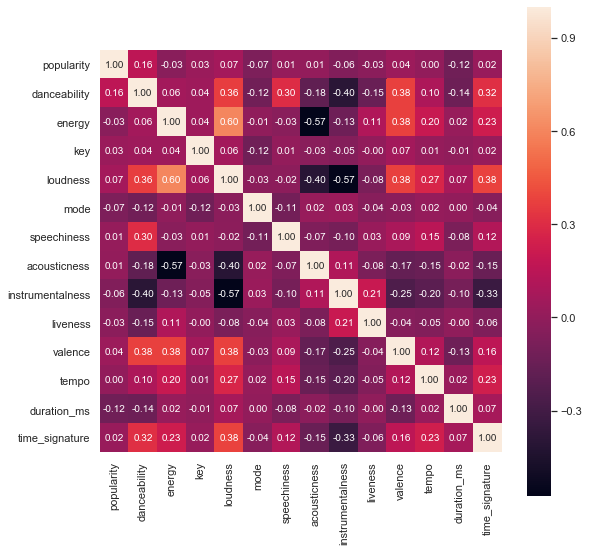

In [90]:
# lets look into the correlation map to see if we can see any correations to popularity
fig, ax = plt.subplots(figsize=(9,9))
# bottom, top = ax.get_ylim()  

corr = merged_tracks.drop('year', axis=1).corr()
sns_plot = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True, ax=ax)


# to fix the half box error from sns heatmap we have to adjust the ax limits using the code below
bottom, top = ax.get_ylim()  
ax.set_ylim(bottom + 0.5, top - 0.5)

sns_plot

# fig = sns_plot.get_figure()
# fig.savefig('../img/Portfolio/Spotify_corr_map.png')

From above we are able to see the most that dancibility energy loudness and valence seem to have to greatest correlation. We can plot this in a scatter plot. 

<Figure size 648x648 with 0 Axes>

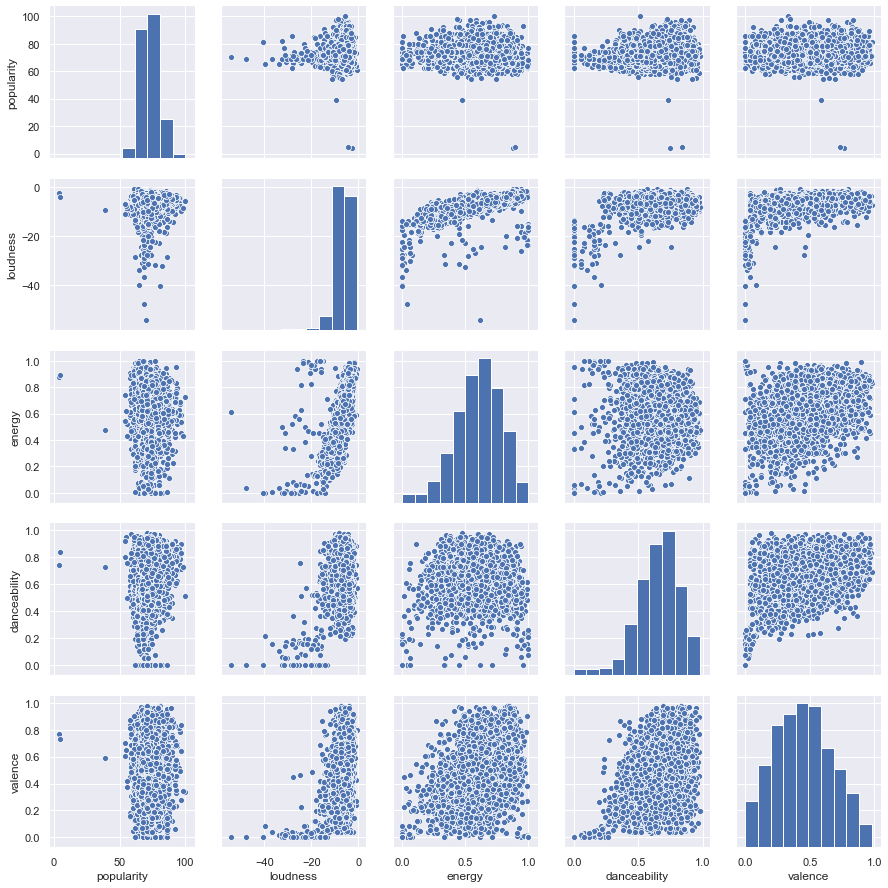

In [91]:
int_features = merged_tracks[['popularity','loudness','energy','danceability','valence']]
plt.figure(figsize =(9,9))
sns_plot = sns.pairplot(int_features)
sns_plot
# fig=sns_plot
# fig.savefig('../img/Portfolio/SpotifyPairPlot.png')

Here we can see some interesting relationships. For example looking at loudness the songs that seem to be quiter are not as popular as those that are. We can also see that although alot of the songs are pretty danceable there are also alot of non popular songs.

After observing we can use these features to predict the popularity of a song using Machine Learning.

In [92]:
merged_tracks.shape

(2895, 18)

In [93]:
uniq_artists = merged_tracks['artist_name'].unique()

# for loop to create dictionary of keys/values
count=0
d = {}
for artist in uniq_artists:
    d[count] = artist
    count += 1
d = pd.DataFrame.from_dict(d, orient='index',columns=['artist_name' ]).reset_index()
merged_tracks = merged_tracks.merge(d, on='artist_name')
merged_tracks.rename(columns={'index': 'mapping'}, inplace=True)

(2895, 19)


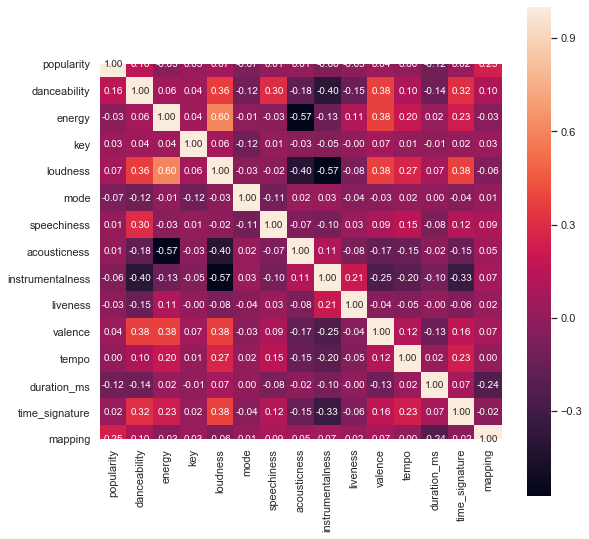

In [99]:
print(merged_tracks.shape)
merged_tracks.head()
# now that we have mapping to each unique artists we can see if there is any correlations with the artists

fig, ax = plt.subplots(figsize=(9,9))
# bottom, top = ax.get_ylim()  

corr = merged_tracks.drop('year', axis=1).corr()
sns_plot = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True, ax=ax)

Here we can see there is a corelation between mapping (artist) and popularity we can try to visulaize this in a scatter plot

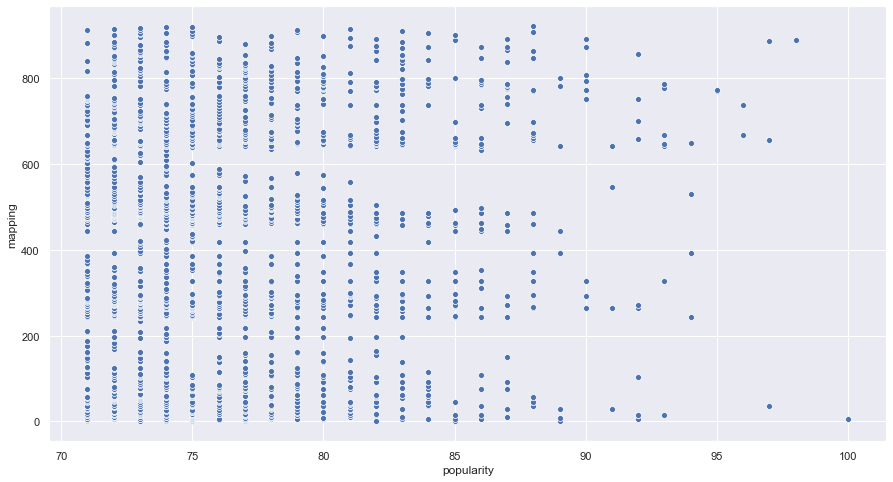

In [106]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot( merged_tracks[merged_tracks['popularity'] > 70].popularity, merged_tracks['mapping'],)

Here we see that some aritits seem to have more popular songs than others lets say over about a score of 85. lets analyze those songs and see if there is any corelation there 

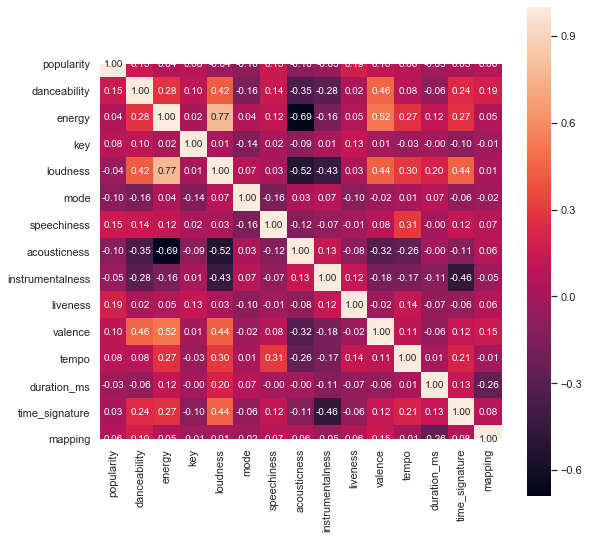

In [109]:
popular = merged_tracks[merged_tracks['popularity'] >= 85]
popular.head()

fig, ax = plt.subplots(figsize=(9,9))
# bottom, top = ax.get_ylim()  

corr = popular.drop('year', axis=1).corr()
sns_plot = sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True, ax=ax)

<Figure size 648x648 with 0 Axes>

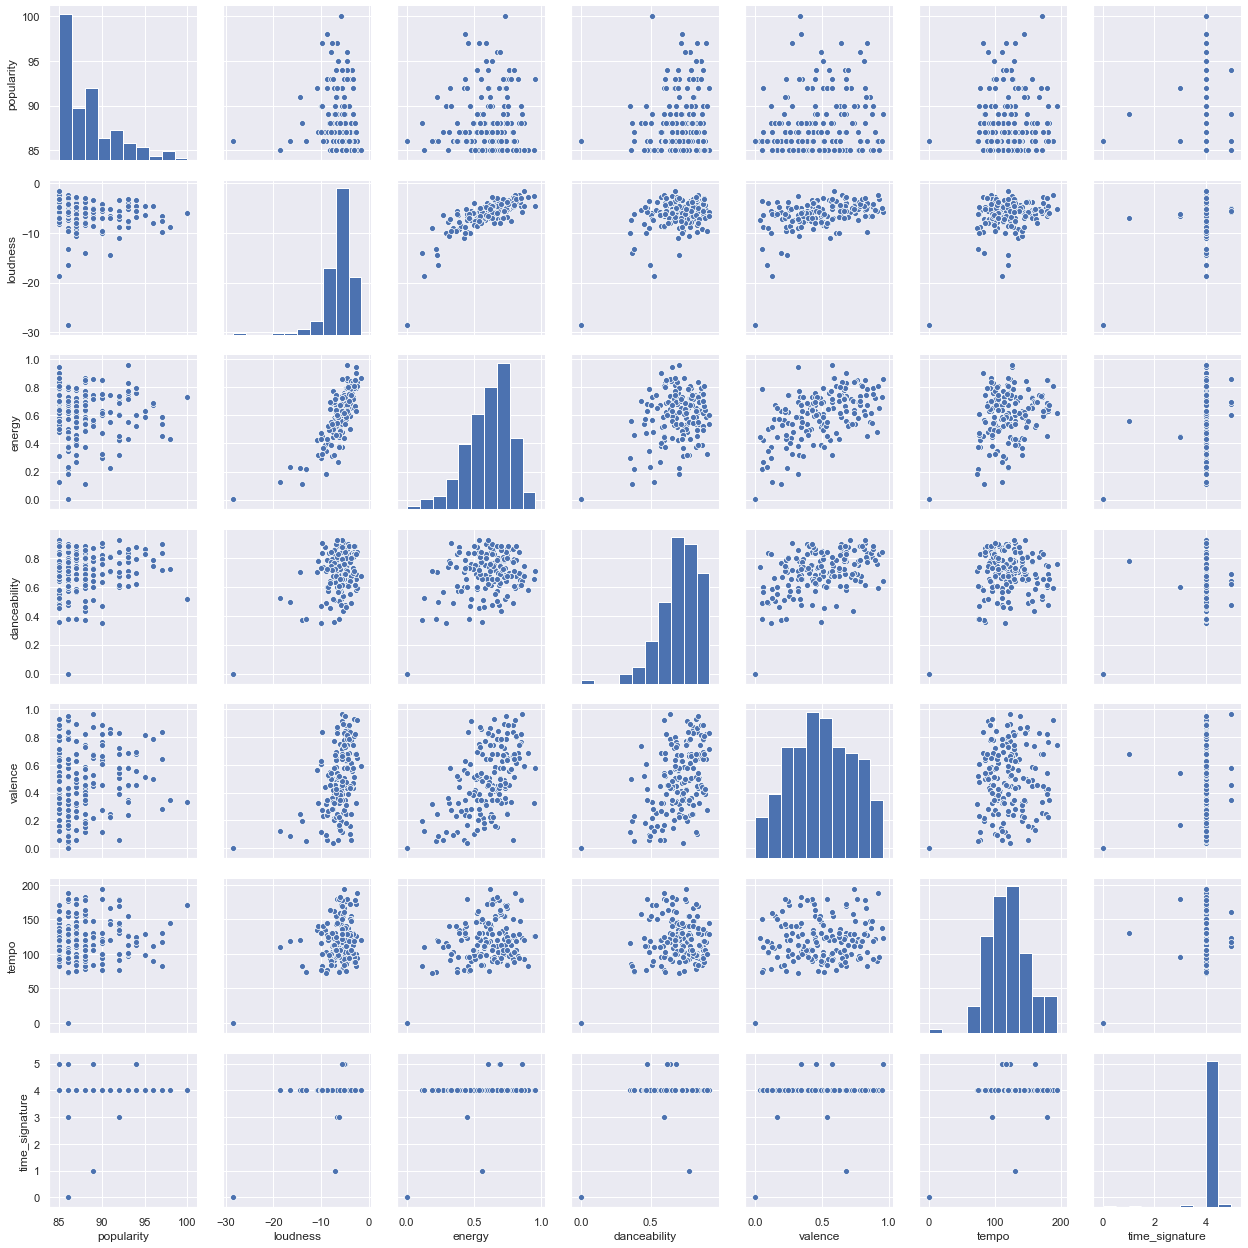

In [111]:
int_features = popular[['popularity','loudness','energy','danceability','valence', 'tempo', 'time_signature']]
plt.figure(figsize =(9,9))
sns_plot = sns.pairplot(int_features)

# Machine learning 

Using maching learning to predict popularity based on feautres such as dancibility etc. We will use three models to predict and compare the accuracy of our models. We will use, KNN
SVM
Decision Tree


#### K - Nearest Neighbors 

In [19]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

In [20]:
features = int_features.drop('popularity', axis=1)
label = int_features['popularity']
X_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)


In [21]:
KnnR = KNeighborsRegressor(n_neighbors=10)
KnnR.fit(X_train, y_train)
pred = KnnR.predict(x_test)

In [22]:
pred

array([71. , 75.6, 73.8, 74.7, 69.4, 71.4, 71.9, 79.9, 70.8, 72.8, 71.2,
       68.8, 77.1, 74.6, 75.3, 75.3, 70.4, 73.4, 70.4, 76.4, 73.5, 70.5,
       75.3, 72.5, 74.7, 72.7, 75.8, 71.7, 73.9, 72.3, 71.5, 78.1, 72.7,
       75.8, 73.7, 74.1, 70.5, 71. , 74.5, 74. , 77.2, 71.1, 71.3, 75.7,
       78. , 68.5, 75.1, 78.1, 76.3, 71.9, 70.3, 74.3, 78.3, 79.8, 73.6,
       71.1, 69.1, 73.2, 72.7, 72.3, 73.9, 74.4, 72.8, 73.5, 75.5, 73.9,
       71.9, 74.8, 70.6, 71.5, 71. , 70.2, 69.6, 78.9, 75.1, 75.1, 75.7,
       69.1, 71.6, 72.8, 69. , 75. , 75.1, 74.6, 74.4, 73.4, 76.6, 72.6,
       69.1, 78.9, 74.1, 75.5, 77.6, 72.5, 73.3, 74.8, 75.1, 73.6, 68.8,
       75.5, 74.5, 73.7, 76.1, 73. , 72.8, 72.8, 75.2, 69.5, 76. , 71.7,
       78.6, 72.2, 74.4, 74.3, 73.7, 74.2, 75. , 73.6, 71.2, 78.7, 73.5,
       70.1, 70.2, 73.2, 70.1, 80.8, 71.9, 73.9, 66.6, 75.4, 75.8, 75.1,
       77. , 76.2, 69.4, 72.6, 71.2, 73. , 75.9, 73.3, 75. , 73.8, 70.8,
       70.8, 68.9, 73.5, 73.4, 77.4, 73.1, 71.1, 74

In [23]:
KnnR.score(X_train, y_train)

0.13412864899836507

In [24]:
KnnR.score(x_test, y_test)

-0.05999930620348293

In [25]:
seed = 44  # random seed
## initializing regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

''''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
lr = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
kr = KernelRidge()
dt = DecisionTreeRegressor(random_state = seed)
svr = SVR()
knn = KNeighborsRegressor(n_jobs= -1)
pls = PLSRegression()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)

In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# x_test = scaler.fit_transform(x_test)
# y_train = scaler.fit_transform(y_train.reshape(-1,1))
# y_test = scaler.fit_transform(y_test)

Text(0.5, 1.0, 'Training Score (R^2) vs Model')

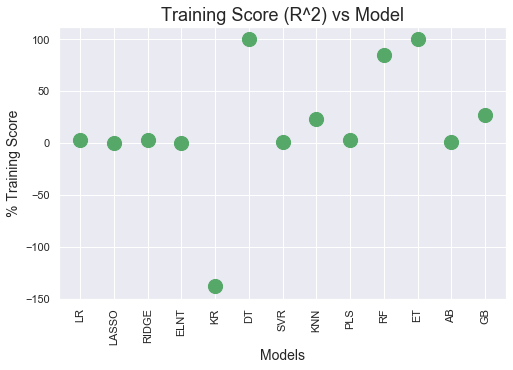

In [27]:
## function to return accuracy by default score method that reurns R^2
def r2_train(model):
    model.fit(X_train, y_train)
    return model.score(X_train, y_train)

## calculating R^2 score for all the models in a for loop
models = [lr, lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb]
training_score = []
for model in models:
    training_score.append(r2_train(model))

## plotting training accuracy for each model 
train_score = pd.DataFrame(data = training_score, columns = ['Training R^2'])
## naming the index column values according to model type
train_score.index = ['LR', 'LASSO',  'RIDGE', 'ELNT', 'KR', 'DT', 'SVR', 'KNN', 'PLS', 'RF', 'ET', 'AB', 'GB']

train_score = (train_score*100).round(4)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(train_score.index, train_score['Training R^2'], s = 200, c='g')
plt.xticks(rotation = 90)
ax.set_xlabel('Models',  fontsize=14)
ax.set_ylabel('% Training Score',  fontsize=14)
ax.set_title('Training Score (R^2) vs Model',  fontsize=18)

In [28]:
pred = dt.predict(x_test)

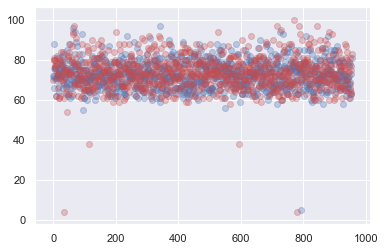

In [29]:
plt.scatter(np.arange(len(y_test)), y_test, alpha=0.3)
plt.scatter(np.arange(len(y_test)), pred, color='r', alpha=0.3)


In [30]:
x_test.head()

,loudness,energy,danceability,valence
141,-6.376,0.873,0.613,0.392
2527,-4.640,0.641,0.856,0.745
1778,-4.963,0.785,0.850,0.718
1736,-2.921,0.537,0.783,0.393
1954,-5.060,0.786,0.546,0.679
